<a href="https://colab.research.google.com/github/rezaulcmt/Data_Science_Project_Rezaul/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch    # Use Pytorch a deep learning library
import torch.nn as nn   # Import neural network module from PyTorch
import torch.optim as optim  # Import optimization algorithms from PyTorch
import torchvision # Import torchvision for datasets and pre-trained models
import torchvision.transforms as transforms # Import transforms for data preprocessing
import matplotlib.pyplot as plt # for plotting graphs and images
import numpy as np # for numerical operations
from torchvision import models # Import models from torchvision, such as ResNet, VGG
import random  # for generating random values

# CIFAR100 Restnet50

Set random seeds for reproducibility

In [3]:
"""
Set random seed for PyTorch to ensure reproducibility in CPU operations,
for NumPy to ensure reproducibility in NumPy operations and
for Python's built-in random module to ensure reproducibility.
"""
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)
if torch.cuda.is_available(): # Check Cuda-enabled GPU available
    torch.cuda.manual_seed_all(0) # Set random seed for all cuda operations on all available GPUs
    torch.backends.cudnn.deterministic = True # ensure deterministic results forcing PyTorch to use a fixed computation order.
    torch.backends.cudnn.benchmark = False # Disable the CuDNN auto-tuner to prevent varying computation patterns for same input size.

Device configuration

In [4]:
# Assign cuda if GPU available otherwise cpu for computations
device = 'cuda' if torch.cuda.is_available() else 'cpu'

Prepare CIFAR-100 data

In [5]:
# Define series of transformations for the training dataset.

transform_train = transforms.Compose([
    transforms.Resize(224),  # Rescale to 224x224 to match ImageNet input size
    transforms.ToTensor(), # Convert images to PyTorch tensors (normalized to [0, 1])
    transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761)), # Normalize image with mean and std of CIFAR-100.
])

transform_test = transforms.Compose([  # for the test dataset
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761)),
])

#Load CIFAR-100 training dataset
trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

100%|██████████| 169M/169M [00:12<00:00, 13.2MB/s]


Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified


Load pretrained ResNet18 model and adjust for CIFAR-100

In [6]:
print('==> Loading pretrained ResNet18 model..')
net = models.resnet18(pretrained=True)
net.fc = nn.Linear(net.fc.in_features, 100)  # Adjust final layer for CIFAR-100 (100 classes)
net = net.to(device)

==> Loading pretrained ResNet18 model..


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 193MB/s]


Fine-tune the model on CIFAR-100

In [7]:
"""
Set Cross-Entropy Loss for classification and configure SGD optimizer with learning rate,
momentum and weight decay for efficient training of neural network
"""
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)

Fine-tuning loop

In [9]:
print("==> Starting fine-tuning on CIFAR-100..")
for epoch in range(25):  # Adjust number of epochs as needed
    net.train()
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
    # Print training loss and accuracy for the current epoch.
    print(f"Epoch {epoch+1}: Train Loss: {train_loss/len(trainloader):.3f} | Train Accuracy: {100.*correct/total:.2f}%")

==> Starting fine-tuning on CIFAR-100..
Epoch 1: Train Loss: 0.024 | Train Accuracy: 99.97%
Epoch 2: Train Loss: 0.022 | Train Accuracy: 99.97%
Epoch 3: Train Loss: 0.021 | Train Accuracy: 99.97%
Epoch 4: Train Loss: 0.019 | Train Accuracy: 99.97%
Epoch 5: Train Loss: 0.018 | Train Accuracy: 99.97%
Epoch 6: Train Loss: 0.017 | Train Accuracy: 99.97%
Epoch 7: Train Loss: 0.016 | Train Accuracy: 99.97%
Epoch 8: Train Loss: 0.016 | Train Accuracy: 99.97%
Epoch 9: Train Loss: 0.015 | Train Accuracy: 99.97%
Epoch 10: Train Loss: 0.014 | Train Accuracy: 99.97%
Epoch 11: Train Loss: 0.014 | Train Accuracy: 99.98%
Epoch 12: Train Loss: 0.013 | Train Accuracy: 99.98%
Epoch 13: Train Loss: 0.013 | Train Accuracy: 99.97%
Epoch 14: Train Loss: 0.012 | Train Accuracy: 99.97%
Epoch 15: Train Loss: 0.012 | Train Accuracy: 99.97%
Epoch 16: Train Loss: 0.012 | Train Accuracy: 99.97%
Epoch 17: Train Loss: 0.011 | Train Accuracy: 99.97%
Epoch 18: Train Loss: 0.011 | Train Accuracy: 99.97%
Epoch 19: Train

Define FGSM and PGD attack functions

In [10]:
def fgsm_attack(model, x, y, epsilon):
    x_adv = x.clone().detach().requires_grad_(True).to(device)
    output = model(x_adv)
    loss = criterion(output, y)
    model.zero_grad()
    loss.backward()
    x_adv = x_adv + epsilon * x_adv.grad.sign()
    x_adv = torch.clamp(x_adv, 0, 1)
    return x_adv

def pgd_attack(model, x, y, alpha, epsilon, num_iter):
    x_adv = x.clone().detach().requires_grad_(True).to(device)
    for _ in range(num_iter):
        output = model(x_adv)
        loss = criterion(output, y)
        model.zero_grad()
        loss.backward()
        x_adv = x_adv + alpha * x_adv.grad.sign()
        eta = torch.clamp(x_adv - x, min=-epsilon, max=epsilon)
        x_adv = torch.clamp(x + eta, 0, 1).detach_().requires_grad_(True)
    return x_adv

Carlini-Wagner attack function

In [11]:
def carlini_wagner_attack(model, images, labels, targeted=False, c=1e-4, kappa=0, num_iter=100, learning_rate=0.01):
    images = images.clone().detach().to(device)
    labels = labels.to(device)
    adv_images = images.clone().detach()
    adv_images.requires_grad = True
    optimizer = optim.Adam([adv_images], lr=learning_rate)

    for _ in range(num_iter):
        outputs = model(adv_images)

        if targeted:
            target_class = labels
            f_loss = torch.max((outputs - outputs.gather(1, target_class.view(-1, 1)).squeeze() + kappa).clamp(min=0))
        else:
            correct_class = outputs.gather(1, labels.view(-1, 1)).squeeze()
            f_loss = torch.max((correct_class - outputs + kappa).clamp(min=0), 1).values.mean()

        l2_loss = torch.norm((adv_images - images).view(images.size(0), -1), dim=1).mean()
        loss = l2_loss + c * f_loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        adv_images.data = torch.clamp(adv_images.data, 0, 1)

    return adv_images

Test function to evaluate model accuracy on clean or adversarial examples

In [12]:
def test_adversarial(model, attack=None, epsilon=None, alpha=None, num_iter=None):
    correct = 0
    total = 0
    for inputs, targets in testloader:
        inputs, targets = inputs.to(device), targets.to(device)

        if attack == 'FGSM':
            inputs = fgsm_attack(model, inputs, targets, epsilon)
        elif attack == 'PGD':
            inputs = pgd_attack(model, inputs, targets, alpha, epsilon, num_iter)
        elif attack == 'CW':
            inputs = carlini_wagner_attack(model, inputs, targets, targeted=False, num_iter=100, learning_rate=0.01)

        outputs = model(inputs)
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    acc = 100 * correct / total
    if attack:
        print(f'Accuracy on {attack} adversarial examples: {acc:.2f}%')
    else:
        print(f'Accuracy on clean images: {acc:.2f}%')
    return acc

Calculate base accuracy on clean images

In [13]:
print("==> Evaluating on clean images..")
acc_clean = test_adversarial(net)

==> Evaluating on clean images..
Accuracy on clean images: 78.51%


Parameters for FGSM, PGD, and C&W attacks

In [14]:
epsilon_fgsm = 0.1
epsilon_pgd = 2 / 255
alpha = 2 / 255
num_iter = 5

Testing the pretrained ResNet model on FGSM, PGD, and C&W attacks

In [15]:
acc_fgsm = test_adversarial(net, attack='FGSM', epsilon=epsilon_fgsm)
acc_pgd = test_adversarial(net, attack='PGD', epsilon=epsilon_pgd, alpha=alpha, num_iter=num_iter)
acc_cw = test_adversarial(net, attack='CW')

Accuracy on FGSM adversarial examples: 24.97%
Accuracy on PGD adversarial examples: 4.36%
Accuracy on CW adversarial examples: 2.46%


Plot results

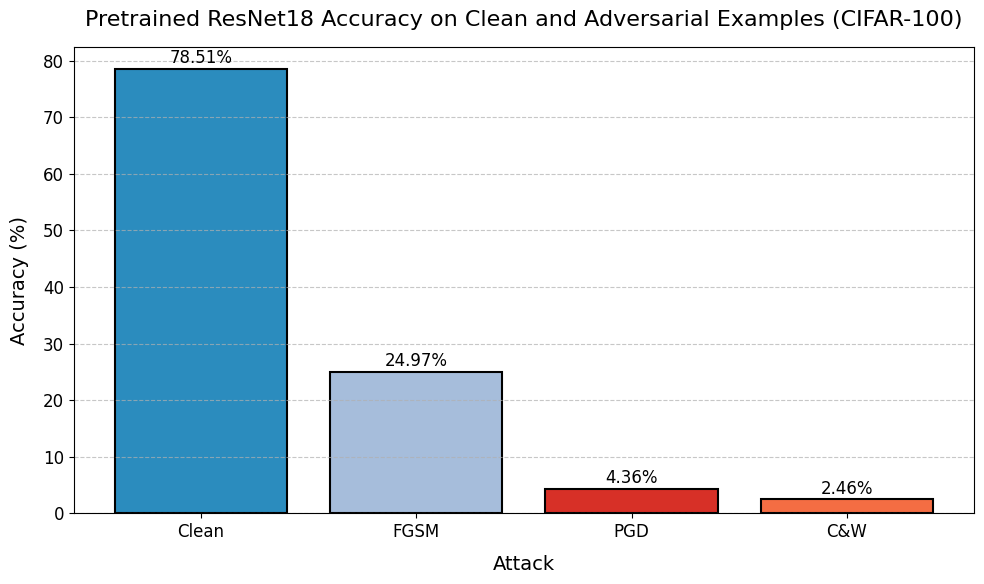

In [16]:
#attacks = ['Clean', 'FGSM', 'PGD', 'C&W']
#accuracies = [acc_clean, acc_fgsm, acc_pgd, acc_cw]
#plt.bar(attacks, accuracies)
#plt.xlabel('Attack')
#plt.ylabel('Accuracy (%)')
#plt.title('Pretrained ResNet18 Accuracy on Clean and Adversarial Examples (CIFAR-100)')
#plt.show()

import matplotlib.pyplot as plt

# Sample data for demonstration
attacks = ['Clean', 'FGSM', 'PGD', 'C&W']
accuracies = [acc_clean, acc_fgsm, acc_pgd, acc_cw]  # Replace with acc_clean, acc_fgsm, acc_pgd, acc_cw

# Define color palette for bars
colors = ['#2b8cbe', '#a6bddb', '#d73027', '#f46d43']

# Enhance the plot
plt.figure(figsize=(10, 6))  # Adjust size for better visibility
bar_width = 0.2
plt.bar(attacks, accuracies, color=colors, edgecolor='black', linewidth=1.5)

# Add labels and title
plt.xlabel('Attack', fontsize=14, labelpad=10)
plt.ylabel('Accuracy (%)', fontsize=14, labelpad=10)
plt.title('Pretrained ResNet18 Accuracy on Clean and Adversarial Examples (CIFAR-100)',
          fontsize=16, pad=15)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize the y-axis for better readability
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# Annotate bars with accuracy values
for i, value in enumerate(accuracies):
    plt.text(i, value + 1, f'{value}%', ha='center', fontsize=12)

# Apply a modern style
plt.style.use('classic')

# Show the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()


# CIFAR100 VGG19

In [17]:
# Load pretrained VGG19 model and adjust for CIFAR-100
print('==> Loading pretrained VGG19 model..')
net = models.vgg19(pretrained=True)
net.classifier[6] = nn.Linear(net.classifier[6].in_features, 100)  # Adjust final layer for CIFAR-100
net = net.to(device)

==> Loading pretrained VGG19 model..


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:03<00:00, 187MB/s]


In [ ]:
# Fine-tune the model on CIFAR-100
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)

In [ ]:
print("==> Starting fine-tuning on CIFAR-100..")
for epoch in range(25):
    net.train()
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    print(f"Epoch {epoch+1}: Train Loss: {train_loss/len(trainloader):.3f} | Train Accuracy: {100.*correct/total:.2f}%")

==> Starting fine-tuning on CIFAR-100..
Epoch 1: Train Loss: 2.031 | Train Accuracy: 47.10%
Epoch 2: Train Loss: 1.072 | Train Accuracy: 68.06%
Epoch 3: Train Loss: 0.829 | Train Accuracy: 74.70%
Epoch 4: Train Loss: 0.681 | Train Accuracy: 78.87%
Epoch 5: Train Loss: 0.556 | Train Accuracy: 82.28%
Epoch 6: Train Loss: 0.458 | Train Accuracy: 85.02%
Epoch 7: Train Loss: 0.370 | Train Accuracy: 87.90%
Epoch 8: Train Loss: 0.305 | Train Accuracy: 89.92%
Epoch 9: Train Loss: 0.247 | Train Accuracy: 91.66%
Epoch 10: Train Loss: 0.207 | Train Accuracy: 92.96%
Epoch 11: Train Loss: 0.176 | Train Accuracy: 94.14%
Epoch 12: Train Loss: 0.146 | Train Accuracy: 95.03%
Epoch 13: Train Loss: 0.124 | Train Accuracy: 95.71%
Epoch 14: Train Loss: 0.109 | Train Accuracy: 96.24%
Epoch 15: Train Loss: 0.099 | Train Accuracy: 96.66%
Epoch 16: Train Loss: 0.085 | Train Accuracy: 97.14%
Epoch 17: Train Loss: 0.073 | Train Accuracy: 97.57%
Epoch 18: Train Loss: 0.066 | Train Accuracy: 97.78%
Epoch 19: Train

In [18]:
# Define FGSM and PGD attack functions
def fgsm_attack(model, x, y, epsilon):
    x_adv = x.clone().detach().requires_grad_(True).to(device)
    output = model(x_adv)
    loss = criterion(output, y)
    model.zero_grad()
    loss.backward()
    x_adv = x_adv + epsilon * x_adv.grad.sign()
    x_adv = torch.clamp(x_adv, 0, 1)
    return x_adv

def pgd_attack(model, x, y, alpha, epsilon, num_iter):
    x_adv = x.clone().detach().requires_grad_(True).to(device)
    for _ in range(num_iter):
        output = model(x_adv)
        loss = criterion(output, y)
        model.zero_grad()
        loss.backward()
        x_adv = x_adv + alpha * x_adv.grad.sign()
        eta = torch.clamp(x_adv - x, min=-epsilon, max=epsilon)
        x_adv = torch.clamp(x + eta, 0, 1).detach_().requires_grad_(True)
    return x_adv

In [19]:
# Carlini-Wagner attack function
def carlini_wagner_attack(model, images, labels, targeted=False, c=1e-4, kappa=0, num_iter=100, learning_rate=0.01):
    images = images.clone().detach().to(device)
    labels = labels.to(device)
    adv_images = images.clone().detach()
    adv_images.requires_grad = True
    optimizer = optim.Adam([adv_images], lr=learning_rate)

    for _ in range(num_iter):
        outputs = model(adv_images)

        if targeted:
            target_class = labels
            f_loss = torch.max((outputs - outputs.gather(1, target_class.view(-1, 1)).squeeze() + kappa).clamp(min=0))
        else:
            correct_class = outputs.gather(1, labels.view(-1, 1)).squeeze()
            f_loss = torch.max((correct_class - outputs + kappa).clamp(min=0), 1).values.mean()

        l2_loss = torch.norm((adv_images - images).view(images.size(0), -1), dim=1).mean()
        loss = l2_loss + c * f_loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        adv_images.data = torch.clamp(adv_images.data, 0, 1)

    return adv_images

In [20]:
# Test function to evaluate model accuracy on clean or adversarial examples
def test_adversarial(model, attack=None, epsilon=None, alpha=None, num_iter=None):
    correct = 0
    total = 0
    for inputs, targets in testloader:
        inputs, targets = inputs.to(device), targets.to(device)

        if attack == 'FGSM':
            inputs = fgsm_attack(model, inputs, targets, epsilon)
        elif attack == 'PGD':
            inputs = pgd_attack(model, inputs, targets, alpha, epsilon, num_iter)
        elif attack == 'CW':
            inputs = carlini_wagner_attack(model, inputs, targets, targeted=False, num_iter=100, learning_rate=0.01)

        outputs = model(inputs)
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    acc = 100 * correct / total
    if attack:
        print(f'Accuracy on {attack} adversarial examples: {acc:.2f}%')
    else:
        print(f'Accuracy on clean images: {acc:.2f}%')
    return acc

In [24]:
# Evaluate on clean images
print("==> Evaluating on clean images..")
acc_clean = test_adversarial(net)

==> Evaluating on clean images..
Accuracy on clean images: 0.94%


In [25]:
# Parameters for FGSM, PGD, and C&W attacks
epsilon_fgsm = 0.1
epsilon_pgd = 2 / 255
alpha = 2 / 255
num_iter = 5


In [26]:
# Testing the pretrained VGG19 model on FGSM, PGD, and C&W attacks
acc_fgsm = test_adversarial(net, attack='FGSM', epsilon=epsilon_fgsm)
acc_pgd = test_adversarial(net, attack='PGD', epsilon=epsilon_pgd, alpha=alpha, num_iter=num_iter)
acc_cw = test_adversarial(net, attack='CW')

Accuracy on FGSM adversarial examples: 1.04%
Accuracy on PGD adversarial examples: 0.23%
Accuracy on CW adversarial examples: 0.80%


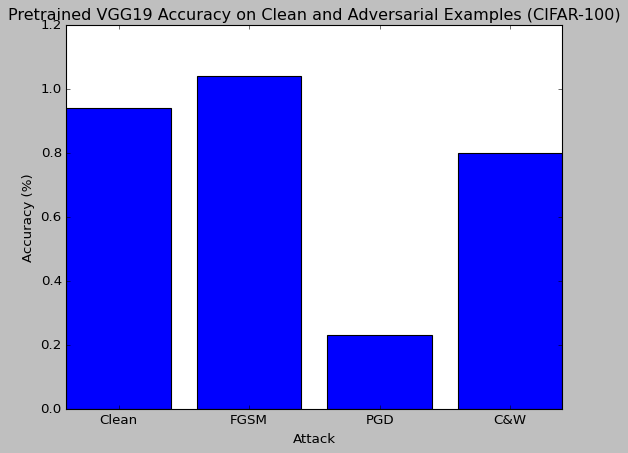

In [27]:
# Plot results
attacks = ['Clean', 'FGSM', 'PGD', 'C&W']
accuracies = [acc_clean, acc_fgsm, acc_pgd, acc_cw]
plt.bar(attacks, accuracies)
plt.xlabel('Attack')
plt.ylabel('Accuracy (%)')
plt.title('Pretrained VGG19 Accuracy on Clean and Adversarial Examples (CIFAR-100)')
plt.show()

# CIFAR100 MobileNetV2

In [28]:
# Load pretrained MobileNetV2 model and adjust for CIFAR-100
print('==> Loading pretrained MobileNetV2 model..')
net = models.mobilenet_v2(pretrained=True)
net.classifier[1] = nn.Linear(net.last_channel, 100)
net = net.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


==> Loading pretrained MobileNetV2 model..


100%|██████████| 13.6M/13.6M [00:00<00:00, 212MB/s]


In [29]:
# Fine-tune the model on CIFAR-100
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)


In [30]:
print("==> Starting fine-tuning on CIFAR-100..")
for epoch in range(25):
    net.train()
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    print(f"Epoch {epoch+1}: Train Loss: {train_loss/len(trainloader):.3f} | Train Accuracy: {100.*correct/total:.2f}%")

==> Starting fine-tuning on CIFAR-100..
Epoch 1: Train Loss: 3.011 | Train Accuracy: 33.01%
Epoch 2: Train Loss: 1.494 | Train Accuracy: 61.50%
Epoch 3: Train Loss: 1.087 | Train Accuracy: 70.17%
Epoch 4: Train Loss: 0.878 | Train Accuracy: 75.45%
Epoch 5: Train Loss: 0.736 | Train Accuracy: 79.15%
Epoch 6: Train Loss: 0.627 | Train Accuracy: 82.27%
Epoch 7: Train Loss: 0.538 | Train Accuracy: 84.74%
Epoch 8: Train Loss: 0.460 | Train Accuracy: 87.22%
Epoch 9: Train Loss: 0.390 | Train Accuracy: 89.39%
Epoch 10: Train Loss: 0.334 | Train Accuracy: 91.34%
Epoch 11: Train Loss: 0.279 | Train Accuracy: 93.02%
Epoch 12: Train Loss: 0.234 | Train Accuracy: 94.63%
Epoch 13: Train Loss: 0.195 | Train Accuracy: 95.87%
Epoch 14: Train Loss: 0.162 | Train Accuracy: 96.90%
Epoch 15: Train Loss: 0.136 | Train Accuracy: 97.64%
Epoch 16: Train Loss: 0.111 | Train Accuracy: 98.36%
Epoch 17: Train Loss: 0.092 | Train Accuracy: 98.86%
Epoch 18: Train Loss: 0.076 | Train Accuracy: 99.21%
Epoch 19: Train

In [31]:
# Define FGSM and PGD attack functions
def fgsm_attack(model, x, y, epsilon):
    x_adv = x.clone().detach().requires_grad_(True).to(device)
    output = model(x_adv)
    loss = criterion(output, y)
    model.zero_grad()
    loss.backward()
    x_adv = x_adv + epsilon * x_adv.grad.sign()
    x_adv = torch.clamp(x_adv, 0, 1)
    return x_adv

def pgd_attack(model, x, y, alpha, epsilon, num_iter):
    x_adv = x.clone().detach().requires_grad_(True).to(device)
    for _ in range(num_iter):
        output = model(x_adv)
        loss = criterion(output, y)
        model.zero_grad()
        loss.backward()
        x_adv = x_adv + alpha * x_adv.grad.sign()
        eta = torch.clamp(x_adv - x, min=-epsilon, max=epsilon)
        x_adv = torch.clamp(x + eta, 0, 1).detach_().requires_grad_(True)
    return x_adv

In [32]:
# Carlini-Wagner attack function
def carlini_wagner_attack(model, images, labels, targeted=False, c=1e-4, kappa=0, num_iter=100, learning_rate=0.01):
    images = images.clone().detach().to(device)
    labels = labels.to(device)
    adv_images = images.clone().detach()
    adv_images.requires_grad = True
    optimizer = optim.Adam([adv_images], lr=learning_rate)

    for _ in range(num_iter):
        outputs = model(adv_images)

        if targeted:
            target_class = labels
            f_loss = torch.max((outputs - outputs.gather(1, target_class.view(-1, 1)).squeeze() + kappa).clamp(min=0))
        else:
            correct_class = outputs.gather(1, labels.view(-1, 1)).squeeze()
            f_loss = torch.max((correct_class - outputs + kappa).clamp(min=0), 1).values.mean()

        l2_loss = torch.norm((adv_images - images).view(images.size(0), -1), dim=1).mean()
        loss = l2_loss + c * f_loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        adv_images.data = torch.clamp(adv_images.data, 0, 1)

    return adv_images

In [33]:
# Test function to evaluate model accuracy on clean or adversarial examples
def test_adversarial(model, attack=None, epsilon=None, alpha=None, num_iter=None):
    correct = 0
    total = 0
    for inputs, targets in testloader:
        inputs, targets = inputs.to(device), targets.to(device)

        if attack == 'FGSM':
            inputs = fgsm_attack(model, inputs, targets, epsilon)
        elif attack == 'PGD':
            inputs = pgd_attack(model, inputs, targets, alpha, epsilon, num_iter)
        elif attack == 'CW':
            inputs = carlini_wagner_attack(model, inputs, targets, targeted=False, num_iter=100, learning_rate=0.01)

        outputs = model(inputs)
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    acc = 100 * correct / total
    if attack:
        print(f'Accuracy on {attack} adversarial examples: {acc:.2f}%')
    else:
        print(f'Accuracy on clean images: {acc:.2f}%')
    return acc

In [34]:
# Evaluate on clean images
print("==> Evaluating on clean images..")
acc_clean = test_adversarial(net)



==> Evaluating on clean images..
Accuracy on clean images: 76.84%


In [35]:
# Parameters for FGSM, PGD, and C&W attacks
epsilon_fgsm = 0.1
epsilon_pgd = 2 / 255
alpha = 2 / 255
num_iter = 5



In [ ]:
# Testing the pretrained MobileNetV2 model on FGSM, PGD, and C&W attacks
acc_fgsm = test_adversarial(net, attack='FGSM', epsilon=epsilon_fgsm)
acc_pgd = test_adversarial(net, attack='PGD', epsilon=epsilon_pgd, alpha=alpha, num_iter=num_iter)
acc_cw = test_adversarial(net, attack='CW')



Accuracy on FGSM adversarial examples: 29.43%
Accuracy on PGD adversarial examples: 3.05%


In [ ]:
# Plot results
attacks = ['Clean', 'FGSM', 'PGD', 'C&W']
accuracies = [acc_clean, acc_fgsm, acc_pgd, acc_cw]
plt.bar(attacks, accuracies)
plt.xlabel('Attack')
plt.ylabel('Accuracy (%)')
plt.title('Pretrained MobileNetV2 Accuracy on Clean and Adversarial Examples (CIFAR-100)')
plt.show()

# SVHN Dataset Resnet50

In [ ]:
# Prepare SVHN dataset
from torchvision.datasets import SVHN

transform_train = transforms.Compose([
    transforms.Resize(224),  # Rescale to 224x224 to match ImageNet input size
    transforms.ToTensor(),
    transforms.Normalize((0.4377, 0.4438, 0.4728), (0.198, 0.201, 0.197)),  # SVHN mean and std
])

transform_test = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.4377, 0.4438, 0.4728), (0.198, 0.201, 0.197)),  # SVHN mean and std
])

trainset = SVHN(root='./data', split='train', download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True, num_workers=2)

testset = SVHN(root='./data', split='test', download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)



In [ ]:
# Load pretrained ResNet50 model and adjust for SVHN
print('==> Loading pretrained ResNet50 model..')
net = models.resnet50(pretrained=True)
net.fc = nn.Linear(net.fc.in_features, 10)  # Adjust final layer for SVHN (10 classes)
net = net.to(device)



In [ ]:
# Fine-tune the model on SVHN
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)



In [ ]:
print("==> Starting fine-tuning on SVHN..")
for epoch in range(25):  # Adjust number of epochs as needed
    net.train()
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    print(f"Epoch {epoch+1}: Train Loss: {train_loss/len(trainloader):.3f} | Train Accuracy: {100.*correct/total:.2f}%")



In [ ]:
# Define FGSM and PGD attack functions
def fgsm_attack(model, x, y, epsilon):
    x_adv = x.clone().detach().requires_grad_(True).to(device)
    output = model(x_adv)
    loss = criterion(output, y)
    model.zero_grad()
    loss.backward()
    x_adv = x_adv + epsilon * x_adv.grad.sign()
    x_adv = torch.clamp(x_adv, 0, 1)
    return x_adv

def pgd_attack(model, x, y, alpha, epsilon, num_iter):
    x_adv = x.clone().detach().requires_grad_(True).to(device)
    for _ in range(num_iter):
        output = model(x_adv)
        loss = criterion(output, y)
        model.zero_grad()
        loss.backward()
        x_adv = x_adv + alpha * x_adv.grad.sign()
        eta = torch.clamp(x_adv - x, min=-epsilon, max=epsilon)
        x_adv = torch.clamp(x + eta, 0, 1).detach_().requires_grad_(True)
    return x_adv



In [ ]:
# Carlini-Wagner attack function
def carlini_wagner_attack(model, images, labels, targeted=False, c=1e-4, kappa=0, num_iter=100, learning_rate=0.01):
    images = images.clone().detach().to(device)
    labels = labels.to(device)
    adv_images = images.clone().detach()
    adv_images.requires_grad = True
    optimizer = optim.Adam([adv_images], lr=learning_rate)

    for _ in range(num_iter):
        outputs = model(adv_images)

        if targeted:
            target_class = labels
            f_loss = torch.max((outputs - outputs.gather(1, target_class.view(-1, 1)).squeeze() + kappa).clamp(min=0))
        else:
            correct_class = outputs.gather(1, labels.view(-1, 1)).squeeze()
            f_loss = torch.max((correct_class - outputs + kappa).clamp(min=0), 1).values.mean()

        l2_loss = torch.norm((adv_images - images).view(images.size(0), -1), dim=1).mean()
        loss = l2_loss + c * f_loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        adv_images.data = torch.clamp(adv_images.data, 0, 1)

    return adv_images



In [ ]:
# Test function to evaluate model accuracy on clean or adversarial examples
def test_adversarial(model, attack=None, epsilon=None, alpha=None, num_iter=None):
    correct = 0
    total = 0
    for inputs, targets in testloader:
        inputs, targets = inputs.to(device), targets.to(device)

        if attack == 'FGSM':
            inputs = fgsm_attack(model, inputs, targets, epsilon)
        elif attack == 'PGD':
            inputs = pgd_attack(model, inputs, targets, alpha, epsilon, num_iter)
        elif attack == 'CW':
            inputs = carlini_wagner_attack(model, inputs, targets, targeted=False, num_iter=100, learning_rate=0.01)

        outputs = model(inputs)
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    acc = 100 * correct / total
    if attack:
        print(f'Accuracy on {attack} adversarial examples: {acc:.2f}%')
    else:
        print(f'Accuracy on clean images: {acc:.2f}%')
    return acc



In [ ]:
# Evaluate on clean images
print("==> Evaluating on clean images..")
acc_clean = test_adversarial(net)



In [ ]:
# Parameters for FGSM, PGD, and C&W attacks
epsilon_fgsm = 0.1
epsilon_pgd = 2 / 255
alpha = 2 / 255
num_iter = 5



In [ ]:
# Testing the pretrained ResNet50 model on FGSM, PGD, and C&W attacks
acc_fgsm = test_adversarial(net, attack='FGSM', epsilon=epsilon_fgsm)
acc_pgd = test_adversarial(net, attack='PGD', epsilon=epsilon_pgd, alpha=alpha, num_iter=num_iter)
acc_cw = test_adversarial(net, attack='CW')



In [ ]:
# Plot results
attacks = ['Clean', 'FGSM', 'PGD', 'C&W']
accuracies = [acc_clean, acc_fgsm, acc_pgd, acc_cw]
plt.bar(attacks, accuracies)
plt.xlabel('Attack')
plt.ylabel('Accuracy (%)')
plt.title('Pretrained ResNet50 Accuracy on Clean and Adversarial Examples (SVHN)')
plt.show()

# SVHN Dataset VGG19

In [ ]:
# Load pretrained VGG19 model and adjust for SVHN
print('==> Loading pretrained VGG19 model..')
net = models.vgg19(pretrained=True)
net.classifier[6] = nn.Linear(4096, 10)  # Adjust final layer for SVHN (10 classes)
net = net.to(device)



In [ ]:
# Fine-tune the model on SVHN
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)

print("==> Starting fine-tuning on SVHN..")
for epoch in range(25):  # Adjust number of epochs as needed
    net.train()
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    print(f"Epoch {epoch+1}: Train Loss: {train_loss/len(trainloader):.3f} | Train Accuracy: {100.*correct/total:.2f}%")



In [ ]:
# Define FGSM and PGD attack functions
def fgsm_attack(model, x, y, epsilon):
    x_adv = x.clone().detach().requires_grad_(True).to(device)
    output = model(x_adv)
    loss = criterion(output, y)
    model.zero_grad()
    loss.backward()
    x_adv = x_adv + epsilon * x_adv.grad.sign()
    x_adv = torch.clamp(x_adv, 0, 1)
    return x_adv

def pgd_attack(model, x, y, alpha, epsilon, num_iter):
    x_adv = x.clone().detach().requires_grad_(True).to(device)
    for _ in range(num_iter):
        output = model(x_adv)
        loss = criterion(output, y)
        model.zero_grad()
        loss.backward()
        x_adv = x_adv + alpha * x_adv.grad.sign()
        eta = torch.clamp(x_adv - x, min=-epsilon, max=epsilon)
        x_adv = torch.clamp(x + eta, 0, 1).detach_().requires_grad_(True)
    return x_adv



In [ ]:
# Carlini-Wagner attack function
def carlini_wagner_attack(model, images, labels, targeted=False, c=1e-4, kappa=0, num_iter=100, learning_rate=0.01):
    images = images.clone().detach().to(device)
    labels = labels.to(device)
    adv_images = images.clone().detach()
    adv_images.requires_grad = True
    optimizer = optim.Adam([adv_images], lr=learning_rate)

    for _ in range(num_iter):
        outputs = model(adv_images)

        if targeted:
            target_class = labels
            f_loss = torch.max((outputs - outputs.gather(1, target_class.view(-1, 1)).squeeze() + kappa).clamp(min=0))
        else:
            correct_class = outputs.gather(1, labels.view(-1, 1)).squeeze()
            f_loss = torch.max((correct_class - outputs + kappa).clamp(min=0), 1).values.mean()

        l2_loss = torch.norm((adv_images - images).view(images.size(0), -1), dim=1).mean()
        loss = l2_loss + c * f_loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        adv_images.data = torch.clamp(adv_images.data, 0, 1)

    return adv_images



In [ ]:
# Test function to evaluate model accuracy on clean or adversarial examples
def test_adversarial(model, attack=None, epsilon=None, alpha=None, num_iter=None):
    correct = 0
    total = 0
    for inputs, targets in testloader:
        inputs, targets = inputs.to(device), targets.to(device)

        if attack == 'FGSM':
            inputs = fgsm_attack(model, inputs, targets, epsilon)
        elif attack == 'PGD':
            inputs = pgd_attack(model, inputs, targets, alpha, epsilon, num_iter)
        elif attack == 'CW':
            inputs = carlini_wagner_attack(model, inputs, targets, targeted=False, num_iter=100, learning_rate=0.01)

        outputs = model(inputs)
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    acc = 100 * correct / total
    if attack:
        print(f'Accuracy on {attack} adversarial examples: {acc:.2f}%')
    else:
        print(f'Accuracy on clean images: {acc:.2f}%')
    return acc




In [ ]:
# Evaluate on clean images
print("==> Evaluating on clean images..")
acc_clean = test_adversarial(net)



In [ ]:
# Parameters for FGSM, PGD, and C&W attacks
epsilon_fgsm = 0.1
epsilon_pgd = 2 / 255
alpha = 2 / 255
num_iter = 5



In [ ]:
# Testing the pretrained VGG19 model on FGSM, PGD, and C&W attacks
acc_fgsm = test_adversarial(net, attack='FGSM', epsilon=epsilon_fgsm)
acc_pgd = test_adversarial(net, attack='PGD', epsilon=epsilon_pgd, alpha=alpha, num_iter=num_iter)
acc_cw = test_adversarial(net, attack='CW')



In [ ]:
# Plot results
attacks = ['Clean', 'FGSM', 'PGD', 'C&W']
accuracies = [acc_clean, acc_fgsm, acc_pgd, acc_cw]
plt.bar(attacks, accuracies)
plt.xlabel('Attack')
plt.ylabel('Accuracy (%)')
plt.title('Pretrained VGG19 Accuracy on Clean and Adversarial Examples (SVHN)')
plt.show()

# SVHN Dataset MobileNetV2

In [ ]:
# Load pretrained MobileNetV2 model and adjust for SVHN
print('==> Loading pretrained MobileNetV2 model..')
net = models.mobilenet_v2(pretrained=True)
net.classifier[1] = nn.Linear(net.last_channel, 10)  # Adjust final layer for SVHN (10 classes)
net = net.to(device)



In [ ]:
# Fine-tune the model on SVHN
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)

print("==> Starting fine-tuning on SVHN..")
for epoch in range(25):  # Adjust number of epochs as needed
    net.train()
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    print(f"Epoch {epoch+1}: Train Loss: {train_loss/len(trainloader):.3f} | Train Accuracy: {100.*correct/total:.2f}%")



In [ ]:
# Define FGSM and PGD attack functions
def fgsm_attack(model, x, y, epsilon):
    x_adv = x.clone().detach().requires_grad_(True).to(device)
    output = model(x_adv)
    loss = criterion(output, y)
    model.zero_grad()
    loss.backward()
    x_adv = x_adv + epsilon * x_adv.grad.sign()
    x_adv = torch.clamp(x_adv, 0, 1)
    return x_adv

def pgd_attack(model, x, y, alpha, epsilon, num_iter):
    x_adv = x.clone().detach().requires_grad_(True).to(device)
    for _ in range(num_iter):
        output = model(x_adv)
        loss = criterion(output, y)
        model.zero_grad()
        loss.backward()
        x_adv = x_adv + alpha * x_adv.grad.sign()
        eta = torch.clamp(x_adv - x, min=-epsilon, max=epsilon)
        x_adv = torch.clamp(x + eta, 0, 1).detach_().requires_grad_(True)
    return x_adv



In [ ]:
# Carlini-Wagner attack function
def carlini_wagner_attack(model, images, labels, targeted=False, c=1e-4, kappa=0, num_iter=100, learning_rate=0.01):
    images = images.clone().detach().to(device)
    labels = labels.to(device)
    adv_images = images.clone().detach()
    adv_images.requires_grad = True
    optimizer = optim.Adam([adv_images], lr=learning_rate)

    for _ in range(num_iter):
        outputs = model(adv_images)

        if targeted:
            target_class = labels
            f_loss = torch.max((outputs - outputs.gather(1, target_class.view(-1, 1)).squeeze() + kappa).clamp(min=0))
        else:
            correct_class = outputs.gather(1, labels.view(-1, 1)).squeeze()
            f_loss = torch.max((correct_class - outputs + kappa).clamp(min=0), 1).values.mean()

        l2_loss = torch.norm((adv_images - images).view(images.size(0), -1), dim=1).mean()
        loss = l2_loss + c * f_loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        adv_images.data = torch.clamp(adv_images.data, 0, 1)

    return adv_images



In [ ]:
# Test function to evaluate model accuracy on clean or adversarial examples
def test_adversarial(model, attack=None, epsilon=None, alpha=None, num_iter=None):
    correct = 0
    total = 0
    for inputs, targets in testloader:
        inputs, targets = inputs.to(device), targets.to(device)

        if attack == 'FGSM':
            inputs = fgsm_attack(model, inputs, targets, epsilon)
        elif attack == 'PGD':
            inputs = pgd_attack(model, inputs, targets, alpha, epsilon, num_iter)
        elif attack == 'CW':
            inputs = carlini_wagner_attack(model, inputs, targets, targeted=False, num_iter=100, learning_rate=0.01)

        outputs = model(inputs)
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    acc = 100 * correct / total
    if attack:
        print(f'Accuracy on {attack} adversarial examples: {acc:.2f}%')
    else:
        print(f'Accuracy on clean images: {acc:.2f}%')
    return acc



In [ ]:
# Evaluate on clean images
print("==> Evaluating on clean images..")
acc_clean = test_adversarial(net)



In [ ]:
# Parameters for FGSM, PGD, and C&W attacks
epsilon_fgsm = 0.1
epsilon_pgd = 2 / 255
alpha = 2 / 255
num_iter = 5



In [ ]:
# Testing the pretrained MobileNetV2 model on FGSM, PGD, and C&W attacks
acc_fgsm = test_adversarial(net, attack='FGSM', epsilon=epsilon_fgsm)
acc_pgd = test_adversarial(net, attack='PGD', epsilon=epsilon_pgd, alpha=alpha, num_iter=num_iter)
acc_cw = test_adversarial(net, attack='CW')



In [ ]:
# Plot results
attacks = ['Clean', 'FGSM', 'PGD', 'C&W']
accuracies = [acc_clean, acc_fgsm, acc_pgd, acc_cw]
plt.bar(attacks, accuracies)
plt.xlabel('Attack')
plt.ylabel('Accuracy (%)')
plt.title('Pretrained MobileNetV2 Accuracy on Clean and Adversarial Examples (SVHN)')
plt.show()

# Diffensive Distilations Restnet50





In [ ]:
# Prepare CIFAR-100 data
transform_train = transforms.Compose([
    transforms.Resize(224),  # Rescale to 224x224 to match ImageNet input size
    transforms.ToTensor(),
    transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761)),
])

transform_test = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761)),
])

trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)



In [ ]:
# Load pretrained ResNet50 model and adjust for CIFAR-100
print('==> Loading pretrained ResNet50 model..')
teacher_model = models.resnet50(pretrained=True)
teacher_model.fc = nn.Linear(teacher_model.fc.in_features, 100)  # Adjust final layer for CIFAR-100
teacher_model = teacher_model.to(device)



In [ ]:
# Train the teacher model (pretrained ResNet50)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(teacher_model.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)

print("==> Fine-tuning the teacher model..")
for epoch in range(5):  # Adjust epochs as needed
    teacher_model.train()
    for inputs, targets in trainloader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = teacher_model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()



In [ ]:
# Generate soft labels with temperature
def generate_soft_labels(model, dataloader, temperature=10):
    soft_labels = []
    for inputs, targets in dataloader:
        inputs, targets = inputs.to(device), targets.to(device)
        with torch.no_grad():
            outputs = model(inputs) / temperature
            soft_labels.append((inputs, torch.softmax(outputs, dim=1)))
    return soft_labels

soft_train_labels = generate_soft_labels(teacher_model, trainloader)



In [ ]:
# Train the distilled (student) model
student_model = models.resnet50(pretrained=True)
student_model.fc = nn.Linear(student_model.fc.in_features, 100)  # Adjust final layer for CIFAR-100
student_model = student_model.to(device)

optimizer = optim.SGD(student_model.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)

def train_student(model, soft_labels, temperature=10):
    model.train()
    for epoch in range(5):
        total_loss = 0
        for inputs, soft_targets in soft_labels:
            inputs, soft_targets = inputs.to(device), soft_targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs) / temperature
            loss = nn.KLDivLoss()(torch.log_softmax(outputs, dim=1), soft_targets)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}: Loss: {total_loss/len(soft_labels):.3f}")

print("==> Training the student model with defensive distillation..")
train_student(student_model, soft_train_labels)



In [ ]:
# Evaluate the student model under adversarial attacks
def test_adversarial_defense(model, attack=None, epsilon=None, alpha=None, num_iter=None):
    correct = 0
    total = 0
    model.eval()
    for inputs, targets in testloader:
        inputs, targets = inputs.to(device), targets.to(device)

        if attack == 'FGSM':
            inputs = fgsm_attack(model, inputs, targets, epsilon)
        elif attack == 'PGD':
            inputs = pgd_attack(model, inputs, targets, alpha, epsilon, num_iter)
        elif attack == 'CW':
            inputs = carlini_wagner_attack(model, inputs, targets, targeted=False, num_iter=100, learning_rate=0.01)

        outputs = model(inputs)
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    acc = 100 * correct / total
    print(f'Accuracy on {attack if attack else "clean"} examples: {acc:.2f}%')
    return acc




In [ ]:
# FGSM, PGD, and CW attack functions remain the same as before
# Parameters for FGSM, PGD, and CW attacks
epsilon_fgsm = 0.1
epsilon_pgd = 2 / 255
alpha = 2 / 255
num_iter = 5



In [ ]:
# Test the student model
print("==> Evaluating the student model under adversarial attacks..")
acc_clean = test_adversarial_defense(student_model)
acc_fgsm = test_adversarial_defense(student_model, attack='FGSM', epsilon=epsilon_fgsm)
acc_pgd = test_adversarial_defense(student_model, attack='PGD', epsilon=epsilon_pgd, alpha=alpha, num_iter=num_iter)
acc_cw = test_adversarial_defense(student_model, attack='CW')



In [ ]:
# Plot results
attacks = ['Clean', 'FGSM', 'PGD', 'C&W']
accuracies = [acc_clean, acc_fgsm, acc_pgd, acc_cw]
plt.bar(attacks, accuracies)
plt.xlabel('Attack')
plt.ylabel('Accuracy (%)')
plt.title('Defensive Distillation with ResNet50 (CIFAR-100)')
plt.show()

# Diffensive Distilations VGG19

In [ ]:
# Load pretrained VGG19 model and adjust for CIFAR-100
print('==> Loading pretrained VGG19 model as the teacher model..')
teacher_model = models.vgg19(pretrained=True)
teacher_model.classifier[6] = nn.Linear(4096, 100)  # Adjust the final layer for CIFAR-100
teacher_model = teacher_model.to(device)



In [ ]:
# Train the teacher model (pretrained VGG19)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(teacher_model.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)

print("==> Fine-tuning the teacher model..")
for epoch in range(5):  # Adjust epochs as needed
    teacher_model.train()
    for inputs, targets in trainloader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = teacher_model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()



In [ ]:
# Generate soft labels with temperature
def generate_soft_labels(model, dataloader, temperature=10):
    soft_labels = []
    for inputs, targets in dataloader:
        inputs, targets = inputs.to(device), targets.to(device)
        with torch.no_grad():
            outputs = model(inputs) / temperature
            soft_labels.append((inputs, torch.softmax(outputs, dim=1)))
    return soft_labels

soft_train_labels = generate_soft_labels(teacher_model, trainloader)



In [ ]:
# Train the distilled (student) model
student_model = models.vgg19(pretrained=True)
student_model.classifier[6] = nn.Linear(4096, 100)  # Adjust the final layer for CIFAR-100
student_model = student_model.to(device)

optimizer = optim.SGD(student_model.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)

def train_student(model, soft_labels, temperature=10):
    model.train()
    for epoch in range(5):
        total_loss = 0
        for inputs, soft_targets in soft_labels:
            inputs, soft_targets = inputs.to(device), soft_targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs) / temperature
            loss = nn.KLDivLoss()(torch.log_softmax(outputs, dim=1), soft_targets)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}: Loss: {total_loss/len(soft_labels):.3f}")

print("==> Training the student model with defensive distillation..")
train_student(student_model, soft_train_labels)



In [ ]:
# FGSM, PGD, and CW attack functions
def fgsm_attack(model, x, y, epsilon):
    x_adv = x.clone().detach().requires_grad_(True).to(device)
    output = model(x_adv)
    loss = criterion(output, y)
    model.zero_grad()
    loss.backward()
    x_adv = x_adv + epsilon * x_adv.grad.sign()
    x_adv = torch.clamp(x_adv, 0, 1)
    return x_adv

def pgd_attack(model, x, y, alpha, epsilon, num_iter):
    x_adv = x.clone().detach().requires_grad_(True).to(device)
    for _ in range(num_iter):
        output = model(x_adv)
        loss = criterion(output, y)
        model.zero_grad()
        loss.backward()
        x_adv = x_adv + alpha * x_adv.grad.sign()
        eta = torch.clamp(x_adv - x, min=-epsilon, max=epsilon)
        x_adv = torch.clamp(x + eta, 0, 1).detach_().requires_grad_(True)
    return x_adv



In [ ]:
def carlini_wagner_attack(model, images, labels, targeted=False, c=1e-4, kappa=0, num_iter=100, learning_rate=0.01):
    images = images.clone().detach().to(device)
    labels = labels.to(device)
    adv_images = images.clone().detach()
    adv_images.requires_grad = True
    optimizer = optim.Adam([adv_images], lr=learning_rate)

    for _ in range(num_iter):
        outputs = model(adv_images)

        if targeted:
            target_class = labels
            f_loss = torch.max((outputs - outputs.gather(1, target_class.view(-1, 1)).squeeze() + kappa).clamp(min=0))
        else:
            correct_class = outputs.gather(1, labels.view(-1, 1)).squeeze()
            f_loss = torch.max((correct_class - outputs + kappa).clamp(min=0), 1).values.mean()

        l2_loss = torch.norm((adv_images - images).view(images.size(0), -1), dim=1).mean()
        loss = l2_loss + c * f_loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        adv_images.data = torch.clamp(adv_images.data, 0, 1)

    return adv_images



In [ ]:
# Evaluate the student model under adversarial attacks
def test_adversarial_defense(model, attack=None, epsilon=None, alpha=None, num_iter=None):
    correct = 0
    total = 0
    model.eval()
    for inputs, targets in testloader:
        inputs, targets = inputs.to(device), targets.to(device)

        if attack == 'FGSM':
            inputs = fgsm_attack(model, inputs, targets, epsilon)
        elif attack == 'PGD':
            inputs = pgd_attack(model, inputs, targets, alpha, epsilon, num_iter)
        elif attack == 'CW':
            inputs = carlini_wagner_attack(model, inputs, targets, targeted=False, num_iter=100, learning_rate=0.01)

        outputs = model(inputs)
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    acc = 100 * correct / total
    print(f'Accuracy on {attack if attack else "clean"} examples: {acc:.2f}%')
    return acc



In [ ]:
# Parameters for FGSM, PGD, and CW attacks
epsilon_fgsm = 0.1
epsilon_pgd = 2 / 255
alpha = 2 / 255
num_iter = 5




In [ ]:
# Test the student model
print("==> Evaluating the student model under adversarial attacks..")
acc_clean = test_adversarial_defense(student_model)
acc_fgsm = test_adversarial_defense(student_model, attack='FGSM', epsilon=epsilon_fgsm)
acc_pgd = test_adversarial_defense(student_model, attack='PGD', epsilon=epsilon_pgd, alpha=alpha, num_iter=num_iter)
acc_cw = test_adversarial_defense(student_model, attack='CW')



In [ ]:
# Plot results
attacks = ['Clean', 'FGSM', 'PGD', 'C&W']
accuracies = [acc_clean, acc_fgsm, acc_pgd, acc_cw]
plt.bar(attacks, accuracies)
plt.xlabel('Attack')
plt.ylabel('Accuracy (%)')
plt.title('Defensive Distillation with VGG19 (CIFAR-100)')
plt.show()

# Diffensive Distilations MobileNetv2

In [ ]:
# Load pretrained MobileNetV2 model and adjust for CIFAR-100
print('==> Loading pretrained MobileNetV2 model as the teacher model..')
teacher_model = models.mobilenet_v2(pretrained=True)
teacher_model.classifier[1] = nn.Linear(teacher_model.last_channel, 100)  # Adjust the final layer for CIFAR-100
teacher_model = teacher_model.to(device)



In [ ]:
# Train the teacher model (pretrained MobileNetV2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(teacher_model.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)

print("==> Fine-tuning the teacher model..")
for epoch in range(5):  # Adjust epochs as needed
    teacher_model.train()
    for inputs, targets in trainloader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = teacher_model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()



In [ ]:
# Generate soft labels with temperature
def generate_soft_labels(model, dataloader, temperature=10):
    soft_labels = []
    for inputs, targets in dataloader:
        inputs, targets = inputs.to(device), targets.to(device)
        with torch.no_grad():
            outputs = model(inputs) / temperature
            soft_labels.append((inputs, torch.softmax(outputs, dim=1)))
    return soft_labels

soft_train_labels = generate_soft_labels(teacher_model, trainloader)



In [ ]:
# Train the distilled (student) model
student_model = models.mobilenet_v2(pretrained=True)
student_model.classifier[1] = nn.Linear(student_model.last_channel, 100)  # Adjust the final layer for CIFAR-100
student_model = student_model.to(device)

optimizer = optim.SGD(student_model.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)

def train_student(model, soft_labels, temperature=10):
    model.train()
    for epoch in range(5):
        total_loss = 0
        for inputs, soft_targets in soft_labels:
            inputs, soft_targets = inputs.to(device), soft_targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs) / temperature
            loss = nn.KLDivLoss()(torch.log_softmax(outputs, dim=1), soft_targets)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}: Loss: {total_loss/len(soft_labels):.3f}")

print("==> Training the student model with defensive distillation..")
train_student(student_model, soft_train_labels)



In [ ]:
# FGSM, PGD, and CW attack functions
def fgsm_attack(model, x, y, epsilon):
    x_adv = x.clone().detach().requires_grad_(True).to(device)
    output = model(x_adv)
    loss = criterion(output, y)
    model.zero_grad()
    loss.backward()
    x_adv = x_adv + epsilon * x_adv.grad.sign()
    x_adv = torch.clamp(x_adv, 0, 1)
    return x_adv

def pgd_attack(model, x, y, alpha, epsilon, num_iter):
    x_adv = x.clone().detach().requires_grad_(True).to(device)
    for _ in range(num_iter):
        output = model(x_adv)
        loss = criterion(output, y)
        model.zero_grad()
        loss.backward()
        x_adv = x_adv + alpha * x_adv.grad.sign()
        eta = torch.clamp(x_adv - x, min=-epsilon, max=epsilon)
        x_adv = torch.clamp(x + eta, 0, 1).detach_().requires_grad_(True)
    return x_adv



In [ ]:
def carlini_wagner_attack(model, images, labels, targeted=False, c=1e-4, kappa=0, num_iter=100, learning_rate=0.01):
    images = images.clone().detach().to(device)
    labels = labels.to(device)
    adv_images = images.clone().detach()
    adv_images.requires_grad = True
    optimizer = optim.Adam([adv_images], lr=learning_rate)

    for _ in range(num_iter):
        outputs = model(adv_images)

        if targeted:
            target_class = labels
            f_loss = torch.max((outputs - outputs.gather(1, target_class.view(-1, 1)).squeeze() + kappa).clamp(min=0))
        else:
            correct_class = outputs.gather(1, labels.view(-1, 1)).squeeze()
            f_loss = torch.max((correct_class - outputs + kappa).clamp(min=0), 1).values.mean()

        l2_loss = torch.norm((adv_images - images).view(images.size(0), -1), dim=1).mean()
        loss = l2_loss + c * f_loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        adv_images.data = torch.clamp(adv_images.data, 0, 1)

    return adv_images



In [ ]:
# Evaluate the student model under adversarial attacks
def test_adversarial_defense(model, attack=None, epsilon=None, alpha=None, num_iter=None):
    correct = 0
    total = 0
    model.eval()
    for inputs, targets in testloader:
        inputs, targets = inputs.to(device), targets.to(device)

        if attack == 'FGSM':
            inputs = fgsm_attack(model, inputs, targets, epsilon)
        elif attack == 'PGD':
            inputs = pgd_attack(model, inputs, targets, alpha, epsilon, num_iter)
        elif attack == 'CW':
            inputs = carlini_wagner_attack(model, inputs, targets, targeted=False, num_iter=100, learning_rate=0.01)

        outputs = model(inputs)
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    acc = 100 * correct / total
    print(f'Accuracy on {attack if attack else "clean"} examples: {acc:.2f}%')
    return acc



In [ ]:
# Parameters for FGSM, PGD, and CW attacks
epsilon_fgsm = 0.1
epsilon_pgd = 2 / 255
alpha = 2 / 255
num_iter = 5




In [ ]:
# Test the student model
print("==> Evaluating the student model under adversarial attacks..")
acc_clean = test_adversarial_defense(student_model)
acc_fgsm = test_adversarial_defense(student_model, attack='FGSM', epsilon=epsilon_fgsm)
acc_pgd = test_adversarial_defense(student_model, attack='PGD', epsilon=epsilon_pgd, alpha=alpha, num_iter=num_iter)
acc_cw = test_adversarial_defense(student_model, attack='CW')



In [ ]:
# Plot results
attacks = ['Clean', 'FGSM', 'PGD', 'C&W']
accuracies = [acc_clean, acc_fgsm, acc_pgd, acc_cw]
plt.bar(attacks, accuracies)
plt.xlabel('Attack')
plt.ylabel('Accuracy (%)')
plt.title('Defensive Distillation with MobileNetV2 (CIFAR-100)')
plt.show()